In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
url_prev = 'https://raw.githubusercontent.com/Sunan2002/Premier-Leauge-Prediction-Model/main/Season%20Datasets/ETraining.csv'
data = pd.read_csv(url_prev)
features = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','FTR', 'HTHG', 'HTAG', 
                 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 
                 'AY', 'HR', 'AR','Referee']
fixtures = pd.concat([data], sort='False')
fixtures = fixtures[features]  
fixtures.shape

<ipython-input-94-4fd7f8cf6cae>:6: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  fixtures = pd.concat([data], sort='False')


(4560, 21)

In [ ]:
fixtures.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
0,Brentford,Arsenal,2,0,H,1,0,H,8,22,...,4,12,8,2,5,0,0,0,0,M Oliver
1,Man United,Leeds,5,1,H,1,0,H,16,10,...,3,11,9,5,4,1,2,0,0,P Tierney
2,Burnley,Brighton,1,2,A,1,0,H,14,14,...,8,10,7,7,6,2,1,0,0,D Coote
3,Chelsea,Crystal Palace,3,0,H,2,0,H,13,4,...,1,15,11,5,2,0,0,0,0,J Moss
4,Everton,Southampton,3,1,H,0,1,A,14,6,...,3,13,15,6,8,2,0,0,0,A Madley


In [ ]:
fixtures.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
4555,Newcastle,West Brom,3,3,D,2,0,H,15,13,...,7,5,8,7,6,0,0,0,0,M Halsey
4556,Stoke,Wigan,0,1,A,0,0,D,11,11,...,9,10,9,5,3,1,4,0,0,A Marriner
4557,Tottenham,Birmingham,2,1,H,0,0,D,22,7,...,3,5,15,7,5,0,3,0,0,M Clattenburg
4558,West Ham,Sunderland,0,3,A,0,1,A,17,17,...,12,7,8,4,6,0,2,0,0,A Taylor
4559,Wolves,Blackburn,2,3,A,0,3,A,12,13,...,10,12,9,8,3,3,1,0,0,H Webb


In [ ]:
encode_results = {"FTR": {"H": 0, "A": 1, "D":2}, "HTR": {"H": 0, "A": 1, "D":2}}
fixtures = fixtures.replace(encode_results)
fixtures.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
0,Brentford,Arsenal,2,0,0,1,0,0,8,22,...,4,12,8,2,5,0,0,0,0,M Oliver
1,Man United,Leeds,5,1,0,1,0,0,16,10,...,3,11,9,5,4,1,2,0,0,P Tierney
2,Burnley,Brighton,1,2,1,1,0,0,14,14,...,8,10,7,7,6,2,1,0,0,D Coote
3,Chelsea,Crystal Palace,3,0,0,2,0,0,13,4,...,1,15,11,5,2,0,0,0,0,J Moss
4,Everton,Southampton,3,1,0,0,1,1,14,6,...,3,13,15,6,8,2,0,0,0,A Madley


In [ ]:
fixtures.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
4555,Newcastle,West Brom,3,3,2,2,0,0,15,13,...,7,5,8,7,6,0,0,0,0,M Halsey
4556,Stoke,Wigan,0,1,1,0,0,2,11,11,...,9,10,9,5,3,1,4,0,0,A Marriner
4557,Tottenham,Birmingham,2,1,0,0,0,2,22,7,...,3,5,15,7,5,0,3,0,0,M Clattenburg
4558,West Ham,Sunderland,0,3,1,0,1,1,17,17,...,12,7,8,4,6,0,2,0,0,A Taylor
4559,Wolves,Blackburn,2,3,1,0,3,1,12,13,...,10,12,9,8,3,3,1,0,0,H Webb


# Home and Away Analysis per Team

In [ ]:
home = fixtures.groupby('HomeTeam').mean() #Summation of each team's home goals (full and half time), shots, corners, cards
away = fixtures.groupby('AwayTeam').mean() #Summation of each team's away goals (full and half time), shots, corners, cards

<ipython-input-99-b51a7127131c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home = fixtures.groupby('HomeTeam').mean() #Summation of each team's home goals (full and half time), shots, corners, cards
<ipython-input-99-b51a7127131c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away = fixtures.groupby('AwayTeam').mean() #Summation of each team's away goals (full and half time), shots, corners, cards


In [ ]:
home

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
HomeTeam,,,,,,,,,,,,,,,,,,
Arsenal,2.004386,0.899123,0.570175,0.850877,0.438596,1.061404,16.035088,9.899123,6.850877,3.798246,10.236842,11.530702,7.114035,4.289474,1.517544,1.934211,0.074561,0.109649
Aston Villa,1.187135,1.444444,0.970760,0.549708,0.660819,1.134503,12.263158,12.058480,4.795322,5.233918,10.982456,11.350877,5.631579,5.842105,1.660819,1.777778,0.093567,0.116959
Birmingham,1.000000,1.157895,1.105263,0.315789,0.368421,1.315789,9.578947,13.631579,4.052632,6.736842,10.105263,12.210526,4.684211,6.578947,1.263158,1.631579,0.105263,0.000000
Blackburn,1.263158,1.289474,0.868421,0.631579,0.500000,1.157895,12.921053,12.921053,6.552632,7.447368,12.000000,10.921053,5.052632,6.210526,1.657895,1.473684,0.052632,0.052632
Blackpool,1.578947,1.947368,1.000000,0.789474,1.000000,1.052632,13.315789,13.684211,7.052632,8.000000,11.368421,10.631579,4.947368,6.473684,1.157895,1.368421,0.000000,0.157895
Bolton,1.500000,1.657895,0.868421,0.578947,0.710526,0.973684,13.500000,13.000000,8.315789,7.763158,12.052632,10.105263,5.421053,6.026316,1.368421,1.552632,0.157895,0.026316
Bournemouth,1.431579,1.557895,0.905263,0.610526,0.726316,1.115789,12.536842,12.768421,4.200000,4.284211,9.178947,12.168421,5.684211,5.115789,1.600000,1.947368,0.052632,0.105263
Brentford,1.157895,1.105263,0.789474,0.315789,0.526316,1.368421,12.263158,11.578947,4.052632,3.789474,9.842105,9.631579,4.631579,5.631579,1.526316,1.157895,0.105263,0.052632
Brighton,1.094737,1.315789,1.094737,0.452632,0.589474,1.231579,12.926316,11.263158,3.568421,3.957895,10.957895,8.968421,5.526316,4.505263,1.663158,1.473684,0.052632,0.042105


In [ ]:
away

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
AwayTeam,,,,,,,,,,,,,,,,,,
Arsenal,1.394737,1.583333,0.881579,0.671053,0.745614,1.092105,12.495614,12.539474,4.929825,5.307018,10.565789,9.771930,5.192982,5.074561,1.785088,1.675439,0.074561,0.127193
Aston Villa,1.725146,1.017544,0.701754,0.684211,0.502924,1.011696,15.192982,10.421053,6.017544,4.210526,11.678363,11.614035,6.479532,4.561404,1.590643,2.116959,0.064327,0.040936
Birmingham,1.894737,0.947368,0.842105,0.842105,0.473684,1.052632,16.000000,7.631579,9.736842,4.105263,11.105263,10.894737,6.473684,3.315789,1.368421,1.736842,0.157895,0.052632
Blackburn,2.315789,1.210526,0.631579,0.842105,0.526316,0.947368,16.368421,8.131579,8.921053,4.736842,9.789474,11.157895,7.921053,3.921053,1.552632,1.842105,0.052632,0.184211
Blackpool,2.157895,1.315789,0.684211,0.842105,0.684211,1.105263,19.473684,10.157895,10.578947,5.315789,9.736842,9.842105,7.526316,4.842105,1.210526,1.315789,0.000000,0.105263
Bolton,1.842105,1.078947,0.578947,0.605263,0.421053,1.157895,16.000000,11.368421,8.473684,6.157895,9.552632,11.868421,7.526316,5.447368,1.078947,1.736842,0.131579,0.105263
Bournemouth,1.915789,1.105263,0.610526,0.957895,0.578947,0.926316,14.768421,10.747368,5.084211,3.652632,11.094737,9.505263,6.063158,5.000000,1.821053,1.463158,0.115789,0.042105
Brentford,1.842105,1.368421,0.736842,1.000000,0.526316,0.736842,14.842105,11.000000,5.842105,4.052632,10.210526,9.684211,6.578947,3.736842,1.473684,1.684211,0.105263,0.052632
Brighton,1.400000,0.905263,0.831579,0.642105,0.421053,0.947368,14.726316,10.084211,4.515789,3.410526,8.957895,10.947368,6.305263,4.136842,1.400000,1.347368,0.031579,0.115789


In [ ]:
team = pd.DataFrame()
team['Team'] = home.index

team = team.merge(home['FTHG'], left_on='Team', right_index=True)
team = team.merge(away['FTAG'], left_on='Team', right_index=True)

team = team.merge(home['FTAG'], left_on='Team', right_index=True)
team = team.merge(away['FTHG'], left_on='Team', right_index=True)

team = team.merge(home['HTHG'], left_on='Team', right_index=True)
team = team.merge(away['HTAG'], left_on='Team', right_index=True)

team = team.merge(home['HTAG'], left_on='Team', right_index=True)
team = team.merge(away['HTHG'], left_on='Team', right_index=True)

team = team.merge(home['HS'], left_on='Team', right_index=True)
team = team.merge(away['AS'], left_on='Team', right_index=True)

team = team.merge(home['HST'], left_on='Team', right_index=True)
team = team.merge(away['AST'], left_on='Team', right_index=True)

team = team.merge(home['HF'], left_on='Team', right_index=True)
team = team.merge(away['AF'], left_on='Team', right_index=True)

team = team.merge(home['HC'], left_on='Team', right_index=True)
team = team.merge(away['AC'], left_on='Team', right_index=True)

team = team.merge(home['HY'], left_on='Team', right_index=True)
team = team.merge(away['AY'], left_on='Team', right_index=True)

team = team.merge(home['HR'], left_on='Team', right_index=True)
team = team.merge(away['AR'], left_on='Team', right_index=True)

team.set_index('Team', inplace=True)
print(team.shape)
team

(38, 20)


,FTHG_x,FTAG_x,FTAG_y,FTHG_y,HTHG_x,HTAG_x,HTAG_y,HTHG_y,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Team,,,,,,,,,,,,,,,,,,,,
Arsenal,2.004386,1.583333,0.899123,1.394737,0.850877,0.745614,0.438596,0.671053,16.035088,12.539474,6.850877,5.307018,10.236842,9.771930,7.114035,5.074561,1.517544,1.675439,0.074561,0.127193
Aston Villa,1.187135,1.017544,1.444444,1.725146,0.549708,0.502924,0.660819,0.684211,12.263158,10.421053,4.795322,4.210526,10.982456,11.614035,5.631579,4.561404,1.660819,2.116959,0.093567,0.040936
Birmingham,1.000000,0.947368,1.157895,1.894737,0.315789,0.473684,0.368421,0.842105,9.578947,7.631579,4.052632,4.105263,10.105263,10.894737,4.684211,3.315789,1.263158,1.736842,0.105263,0.052632
Blackburn,1.263158,1.210526,1.289474,2.315789,0.631579,0.526316,0.500000,0.842105,12.921053,8.131579,6.552632,4.736842,12.000000,11.157895,5.052632,3.921053,1.657895,1.842105,0.052632,0.184211
Blackpool,1.578947,1.315789,1.947368,2.157895,0.789474,0.684211,1.000000,0.842105,13.315789,10.157895,7.052632,5.315789,11.368421,9.842105,4.947368,4.842105,1.157895,1.315789,0.000000,0.105263
Bolton,1.500000,1.078947,1.657895,1.842105,0.578947,0.421053,0.710526,0.605263,13.500000,11.368421,8.315789,6.157895,12.052632,11.868421,5.421053,5.447368,1.368421,1.736842,0.157895,0.105263
Bournemouth,1.431579,1.105263,1.557895,1.915789,0.610526,0.578947,0.726316,0.957895,12.536842,10.747368,4.200000,3.652632,9.178947,9.505263,5.684211,5.000000,1.600000,1.463158,0.052632,0.042105
Brentford,1.157895,1.368421,1.105263,1.842105,0.315789,0.526316,0.526316,1.000000,12.263158,11.000000,4.052632,4.052632,9.842105,9.684211,4.631579,3.736842,1.526316,1.684211,0.105263,0.052632
Brighton,1.094737,0.905263,1.315789,1.400000,0.452632,0.421053,0.589474,0.642105,12.926316,10.084211,3.568421,3.410526,10.957895,10.947368,5.526316,4.136842,1.663158,1.347368,0.052632,0.115789


In [ ]:
matchup_col = ['HomeTeam', 'AwayTeam']
matchups = fixtures[matchup_col]
matchups = matchups.merge(team['FTHG_x'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['FTAG_x'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['FTAG_y'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['FTHG_y'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HTHG_x'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['HTAG_x'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HTAG_y'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['HTHG_y'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HS'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AS'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HST'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AST'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HF'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AF'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HC'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AC'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HY'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AY'], left_on='AwayTeam', right_index=True, how='left')
matchups = matchups.merge(team['HR'], left_on='HomeTeam', right_index=True, how='left')
matchups = matchups.merge(team['AR'], left_on='AwayTeam', right_index=True, how='left')
matchups['FTR'] = fixtures['FTR']
matchups

,HomeTeam,AwayTeam,FTHG_x,FTAG_x,FTAG_y,FTHG_y,HTHG_x,HTAG_x,HTAG_y,HTHG_y,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,Brentford,Arsenal,1.157895,1.583333,1.105263,1.394737,0.315789,0.745614,0.526316,0.671053,...,5.307018,9.842105,9.771930,4.631579,5.074561,1.526316,1.675439,0.105263,0.127193,0
1,Man United,Leeds,1.973684,1.500000,0.912281,1.947368,0.934211,0.578947,0.337719,1.052632,...,4.500000,10.828947,11.394737,6.271930,4.947368,1.495614,1.973684,0.039474,0.052632,0
2,Burnley,Brighton,1.022556,0.905263,1.240602,1.400000,0.496241,0.421053,0.526316,0.642105,...,3.410526,10.293233,10.947368,4.744361,4.136842,1.624060,1.347368,0.000000,0.115789,1
3,Chelsea,Crystal Palace,1.991228,1.140351,0.894737,1.555556,0.942982,0.409357,0.359649,0.608187,...,3.368421,10.307018,11.649123,6.938596,4.502924,1.385965,1.736842,0.057018,0.052632,0
4,Everton,Southampton,1.609649,1.105263,1.131579,1.584211,0.714912,0.510526,0.491228,0.763158,...,4.326316,10.561404,11.505263,6.039474,5.226316,1.513158,1.668421,0.065789,0.052632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Newcastle,West Brom,1.397129,0.959064,1.325359,1.608187,0.602871,0.356725,0.574163,0.830409,...,3.935673,10.760766,11.093567,5.344498,4.046784,1.622010,1.760234,0.062201,0.081871,2
4556,Stoke,Wigan,1.328947,1.035088,1.164474,1.684211,0.611842,0.403509,0.526316,0.561404,...,6.017544,11.361842,11.438596,5.223684,4.070175,1.625000,1.964912,0.059211,0.122807,1
4557,Tottenham,Birmingham,1.859649,0.947368,0.934211,1.894737,0.828947,0.473684,0.403509,0.842105,...,4.105263,10.267544,10.894737,6.697368,3.315789,1.442982,1.736842,0.035088,0.052632,0
4558,West Ham,Sunderland,1.492823,1.000000,1.377990,1.721805,0.674641,0.428571,0.564593,0.669173,...,4.240602,9.990431,11.353383,5.464115,3.977444,1.516746,1.932331,0.043062,0.120301,1


# Training the Model

In [ ]:
X = matchups.drop(['HomeTeam','AwayTeam','FTR'], axis=1)
y = matchups["FTR"]
X.head()

,FTHG_x,FTAG_x,FTAG_y,FTHG_y,HTHG_x,HTAG_x,HTAG_y,HTHG_y,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1.157895,1.583333,1.105263,1.394737,0.315789,0.745614,0.526316,0.671053,12.263158,12.539474,4.052632,5.307018,9.842105,9.771930,4.631579,5.074561,1.526316,1.675439,0.105263,0.127193
1,1.973684,1.500000,0.912281,1.947368,0.934211,0.578947,0.337719,1.052632,15.535088,12.578947,6.657895,4.500000,10.828947,11.394737,6.271930,4.947368,1.495614,1.973684,0.039474,0.052632
2,1.022556,0.905263,1.240602,1.400000,0.496241,0.421053,0.526316,0.642105,11.315789,10.084211,3.631579,3.410526,10.293233,10.947368,4.744361,4.136842,1.624060,1.347368,0.000000,0.115789
3,1.991228,1.140351,0.894737,1.555556,0.942982,0.409357,0.359649,0.608187,17.206140,10.157895,7.118421,3.368421,10.307018,11.649123,6.938596,4.502924,1.385965,1.736842,0.057018,0.052632
4,1.609649,1.105263,1.131579,1.584211,0.714912,0.510526,0.491228,0.763158,13.885965,11.947368,5.600877,4.326316,10.561404,11.505263,6.039474,5.226316,1.513158,1.668421,0.065789,0.052632


In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
4555    2
4556    1
4557    0
4558    1
4559    1
Name: FTR, Length: 4560, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3648, 20)
X_test:  (912, 20)
y_train:  (3648,)
y_test:  (912,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

rfc = RandomForestClassifier(random_state=42)
dictionary = { 'n_estimators': [100, 250, 500], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy'] }
model = GridSearchCV(estimator=rfc, param_grid=dictionary, cv=5, scoring='accuracy', verbose=1)

In [ ]:
model.fit(X_train, y_train)
model.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
prediction = model.predict(X_test)
acc_score = accuracy_score(y_test, prediction)
#cross_val_scores = cross_val_score(model, X_train, y_train, cv=8)

In [ ]:
print("Past 12 Seasons Accuracy Score: ", acc_score)
#print("Past 12 Seasons Cross-Validation Scores")
#print(cross_val_scores)

Past 12 Seasons Accuracy Score:  0.5142543859649122


Text(113.9222222222222, 0.5, 'predicted label')

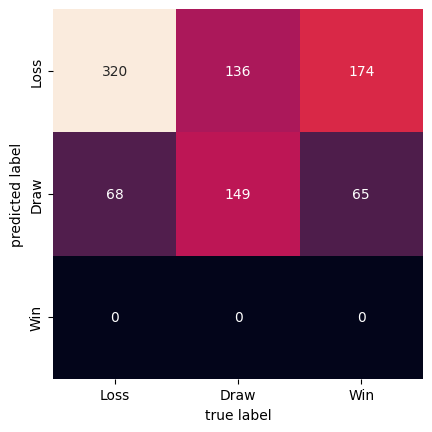

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, xticklabels=['Loss', 'Draw', 'Win'], yticklabels=['Loss', 'Draw', 'Win'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
predicted = pd.DataFrame(model.predict(X), columns=['Predicted'])
fixtures['Predicted'] = predicted 
fixtures

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HF,AF,HC,AC,HY,AY,HR,AR,Referee,Predicted
0,Brentford,Arsenal,2,0,0,1,0,0,8,22,...,12,8,2,5,0,0,0,0,M Oliver,1
1,Man United,Leeds,5,1,0,1,0,0,16,10,...,11,9,5,4,1,2,0,0,P Tierney,0
2,Burnley,Brighton,1,2,1,1,0,0,14,14,...,10,7,7,6,2,1,0,0,D Coote,0
3,Chelsea,Crystal Palace,3,0,0,2,0,0,13,4,...,15,11,5,2,0,0,0,0,J Moss,0
4,Everton,Southampton,3,1,0,0,1,1,14,6,...,13,15,6,8,2,0,0,0,A Madley,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Newcastle,West Brom,3,3,2,2,0,0,15,13,...,5,8,7,6,0,0,0,0,M Halsey,0
4556,Stoke,Wigan,0,1,1,0,0,2,11,11,...,10,9,5,3,1,4,0,0,A Marriner,0
4557,Tottenham,Birmingham,2,1,0,0,0,2,22,7,...,5,15,7,5,0,3,0,0,M Clattenburg,0
4558,West Ham,Sunderland,0,3,1,0,1,1,17,17,...,7,8,4,6,0,2,0,0,A Taylor,0


# Predicted vs Actual Outcomes for the past 12 seasons

In [ ]:
def calculate_points(home, away, result, table, col):
  if result == 2:
    # print("Draw")
    table.loc[home,col] += 1
    table.loc[away,col] += 1
  elif result == 0:
    # print(home + " Win")
    table.loc[home,col] += 3
  elif result == 1:
    # print(away + " Win")
    table.loc[away,col] += 3
  # print(home + ": " + str(table_2122.loc[home,col]))
  # print(away + ": " + str(table_2122.loc[away,col]))
  # print("\n\n")

In [ ]:
year = 21
x = 0
for i in range(12):
  title = "Table for " + str(year) + "-" + str(year+1) + " Season"
  print(title)
  table = pd.DataFrame(index=fixtures.HomeTeam.unique())
  table['Final_Points'] = 0
  table['Predicted_Points'] = 0
  for index, row in (fixtures[x:x+379]).iterrows():
    calculate_points(row.HomeTeam,row.AwayTeam,row.FTR,table,'Final_Points')
    calculate_points(row.HomeTeam,row.AwayTeam,row.Predicted,table,'Predicted_Points')
  table = table[table.Final_Points != 0]
  table = table.sort_values(by='Final_Points', ascending=0)
  year -= 1
  x += 380
  display(table)

Table for 21-22 Season


,Final_Points,Predicted_Points
Man City,93,108
Liverpool,92,99
Chelsea,74,99
Arsenal,69,93
Tottenham,68,90
Man United,58,93
West Ham,56,33
Leicester,52,75
Brighton,51,24
Wolves,51,30


Table for 20-21 Season


,Final_Points,Predicted_Points
Man City,86,108
Man United,71,90
Liverpool,69,99
Chelsea,67,99
Leicester,66,75
West Ham,65,33
Tottenham,62,93
Arsenal,61,93
Leeds,59,63
Everton,59,63


Table for 19-20 Season


,Final_Points,Predicted_Points
Liverpool,99,99
Man City,81,108
Man United,66,93
Chelsea,66,99
Leicester,62,75
Tottenham,59,93
Wolves,59,33
Arsenal,56,93
Sheffield United,54,33
Burnley,54,33


Table for 18-19 Season


,Final_Points,Predicted_Points
Man City,98,108
Liverpool,97,99
Chelsea,72,99
Tottenham,71,93
Arsenal,70,93
Man United,66,93
Wolves,57,33
Everton,54,63
Leicester,52,75
Watford,50,27


Table for 17-18 Season


,Final_Points,Predicted_Points
Man City,100,108
Man United,81,93
Tottenham,77,93
Liverpool,75,99
Chelsea,70,99
Arsenal,63,93
Burnley,54,33
Everton,49,63
Leicester,47,75
Newcastle,44,33


Table for 16-17 Season


,Final_Points,Predicted_Points
Chelsea,93,99
Tottenham,86,93
Liverpool,76,99
Man City,75,105
Arsenal,75,93
Man United,69,93
Everton,61,66
Bournemouth,46,33
Southampton,46,69
West Ham,45,33


Table for 15-16 Season


,Final_Points,Predicted_Points
Leicester,81,75
Arsenal,71,93
Tottenham,70,93
Man City,66,108
Man United,63,90
Southampton,63,69
West Ham,62,33
Liverpool,60,99
Stoke,51,33
Chelsea,50,99


Table for 14-15 Season


,Final_Points,Predicted_Points
Chelsea,87,99
Man City,79,108
Arsenal,75,93
Man United,70,93
Tottenham,64,93
Liverpool,62,96
Southampton,60,69
Swansea,56,33
Stoke,51,33
Crystal Palace,48,30


Table for 13-14 Season


,Final_Points,Predicted_Points
Man City,86,108
Liverpool,84,99
Chelsea,82,99
Arsenal,79,93
Everton,72,69
Tottenham,69,93
Man United,64,93
Southampton,56,75
Newcastle,49,36
Stoke,47,36


Table for 12-13 Season


,Final_Points,Predicted_Points
Man United,89,93
Man City,78,108
Chelsea,75,99
Arsenal,73,93
Tottenham,72,93
Everton,63,69
Liverpool,61,99
West Brom,49,33
West Ham,46,39
Swansea,46,36


Table for 11-12 Season


,Final_Points,Predicted_Points
Man United,89,93
Man City,89,108
Arsenal,70,93
Tottenham,69,93
Newcastle,65,39
Chelsea,64,99
Everton,56,69
Fulham,52,39
Liverpool,52,99
Swansea,47,39


Table for 10-11 Season


,Final_Points,Predicted_Points
Man United,80,93
Man City,71,108
Chelsea,71,99
Arsenal,68,93
Tottenham,62,93
Liverpool,58,99
Everton,54,63
Fulham,49,39
Aston Villa,48,36
West Brom,47,36


# Predicting Current Season Standings and Final Projections

In [ ]:
url_curr = 'raw.githubusercontent.com/Sunan2002/Premier-Leauge-Prediction-Model/main/Season%20Datasets/ECurrent.csv'
data_curr = pd.read_csv(url_prev)
fixtures_curr = pd.concat([data], sort='False')
fixtures_curr = fixtures_curr[features]  
fixtures_curr.shape

<ipython-input-122-30523fdd3133>:3: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  fixtures_curr = pd.concat([data], sort='False')


(4560, 21)

In [ ]:
fixtures_curr.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
0,Brentford,Arsenal,2,0,H,1,0,H,8,22,...,4,12,8,2,5,0,0,0,0,M Oliver
1,Man United,Leeds,5,1,H,1,0,H,16,10,...,3,11,9,5,4,1,2,0,0,P Tierney
2,Burnley,Brighton,1,2,A,1,0,H,14,14,...,8,10,7,7,6,2,1,0,0,D Coote
3,Chelsea,Crystal Palace,3,0,H,2,0,H,13,4,...,1,15,11,5,2,0,0,0,0,J Moss
4,Everton,Southampton,3,1,H,0,1,A,14,6,...,3,13,15,6,8,2,0,0,0,A Madley


In [ ]:
fixtures_curr.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
4555,Newcastle,West Brom,3,3,D,2,0,H,15,13,...,7,5,8,7,6,0,0,0,0,M Halsey
4556,Stoke,Wigan,0,1,A,0,0,D,11,11,...,9,10,9,5,3,1,4,0,0,A Marriner
4557,Tottenham,Birmingham,2,1,H,0,0,D,22,7,...,3,5,15,7,5,0,3,0,0,M Clattenburg
4558,West Ham,Sunderland,0,3,A,0,1,A,17,17,...,12,7,8,4,6,0,2,0,0,A Taylor
4559,Wolves,Blackburn,2,3,A,0,3,A,12,13,...,10,12,9,8,3,3,1,0,0,H Webb


In [ ]:
fixtures_curr = fixtures_curr.replace(encode_results)
fixtures_curr

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Referee
0,Brentford,Arsenal,2,0,0,1,0,0,8,22,...,4,12,8,2,5,0,0,0,0,M Oliver
1,Man United,Leeds,5,1,0,1,0,0,16,10,...,3,11,9,5,4,1,2,0,0,P Tierney
2,Burnley,Brighton,1,2,1,1,0,0,14,14,...,8,10,7,7,6,2,1,0,0,D Coote
3,Chelsea,Crystal Palace,3,0,0,2,0,0,13,4,...,1,15,11,5,2,0,0,0,0,J Moss
4,Everton,Southampton,3,1,0,0,1,1,14,6,...,3,13,15,6,8,2,0,0,0,A Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Newcastle,West Brom,3,3,2,2,0,0,15,13,...,7,5,8,7,6,0,0,0,0,M Halsey
4556,Stoke,Wigan,0,1,1,0,0,2,11,11,...,9,10,9,5,3,1,4,0,0,A Marriner
4557,Tottenham,Birmingham,2,1,0,0,0,2,22,7,...,3,5,15,7,5,0,3,0,0,M Clattenburg
4558,West Ham,Sunderland,0,3,1,0,1,1,17,17,...,12,7,8,4,6,0,2,0,0,A Taylor
